# This tries to address an old issue, which is to reproduce what the tu-programm  is doing, or at least just reading the file without applying any cals

[link to Bob discussion](https://chatgpt.com/g/g-p-67b6018b33448191859813562bab6644-programming-help/c/6972bdf3-023c-8333-9bbe-ba5276bd0c66)

In [12]:
import surfradpy.file_io.mfrsr as srpsrf

In [268]:
plt.rcParams['figure.dpi'] = 200

In [429]:
reload(atmsrf)

<module 'atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad' from '/Users/htelg/prog/atm-py/atmPy/data_archives/NOAA_ESRL_GMD_GRAD/surfrad/surfrad.py'>

In [487]:
p2f = '/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260121_121500.xmd'
# p2f = '/Volumes/grad/Inst/MFR/SURFRAD/gwn/mfrsr/raw/2020/gwn_mfrsr_20201021_120914.xmd'
outold = atmsrf.read_raw(pl.Path(p2f))
dsold = outold.dataset

bla: 20


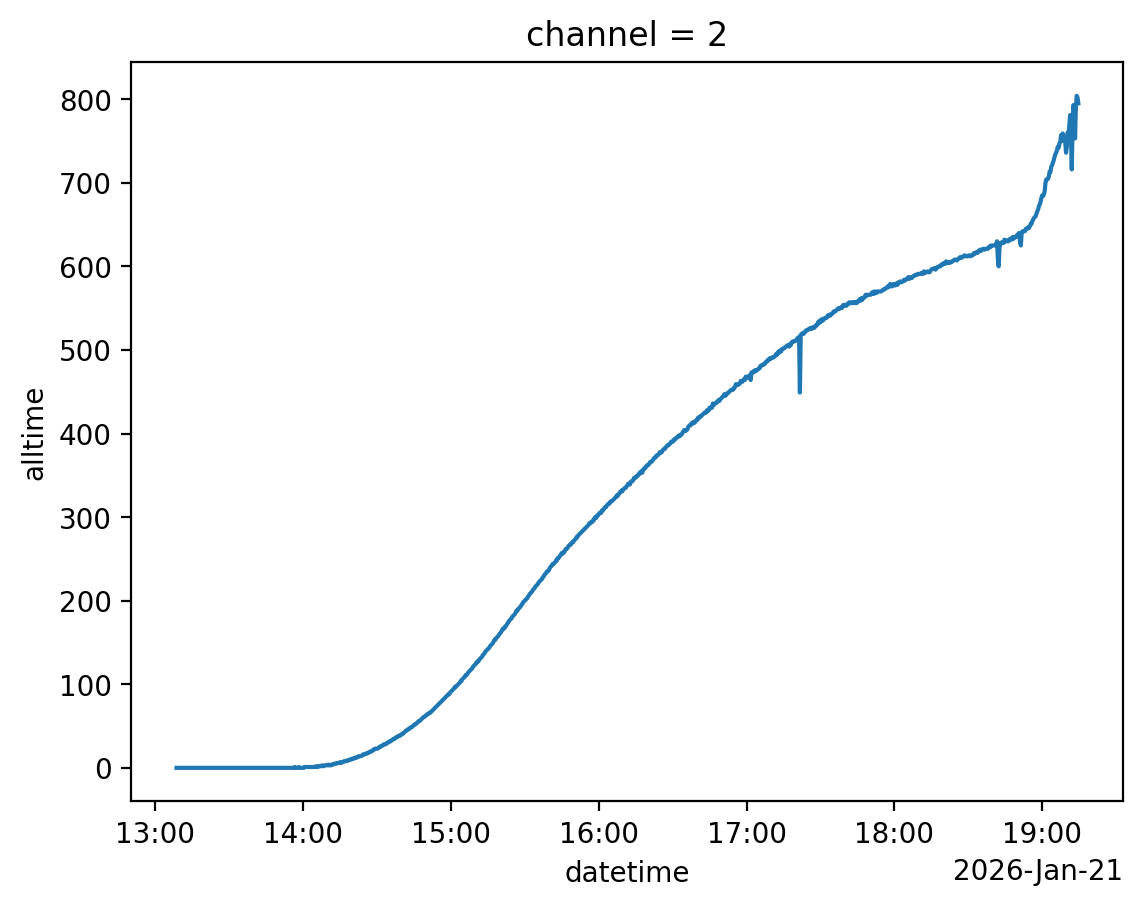

In [488]:
dsold.alltime.sel(channel = 2).plot()

In [489]:
p2f = '/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260121_121500.xmd'
# p2f = '/Volumes/grad/Inst/MFR/SURFRAD/gwn/mfrsr/raw/2020/gwn_mfrsr_20201021_120914.xmd'


In [704]:
reload(srpsrf)

<module 'surfradpy.file_io.mfrsr' from '/Users/htelg/prog/SURFRAD/surfradpy/file_io/mfrsr.py'>

In [705]:
outnew = {}
rsr = srpsrf.rsr_open_file(p2f)
dsnew = rsr.dataset
# outnew = srpsrf.read_raw(p2f, use_str=False, out = outnew)
# dsnew = outnew['ds']

# outnew = srpsrf.read_raw(p2f)
# dsnews = outnew['ds']
# dsnews.global_horizontal.sel(channel = ch).plot()
# dsnew.global_horizontal.sel(channel = ch).plot(lw = 1)

# inp = outnew['inp']
# r = outnew['r']
# veci = outnew['veci']
# data = outnew['data']
# lines = outnew['lines']

# pd.to_datetime(inp.record.obs_time, unit='s')

Opening RSR file: /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260121_121500.xmd


In [706]:
dsnew

<xarray.Dataset> Size: 255kB
Dimensions:             (datetime: 1099, channel: 7)
Coordinates:
  * datetime            (datetime) datetime64[ns] 9kB 2026-01-21T13:08:40 ......
  * channel             (channel) int64 56B 0 1 2 3 4 5 6
Data variables:
    alltime             (datetime, channel) float64 62kB 64.0 0.0 ... 982.0
    global_horizontal   (datetime, channel) float64 62kB nan nan ... 930.0 982.0
    diffuse_horizontal  (datetime, channel) float64 62kB nan nan ... 256.0 272.0
    direct_horizontal   (datetime, channel) float64 62kB nan nan ... 674.0 710.0
Attributes:
    instrument:   mfrsr
    start_time:   2026-01-21 13:08:40
    avg_period:   20
    sample_rate:  20
    logger_id:    D824
    head_id:      3126
    soft_rev:     13
    latitude:     40.1165771484375
    longitude:    105.2325439453125
    band_on:      1
    diodes:       7

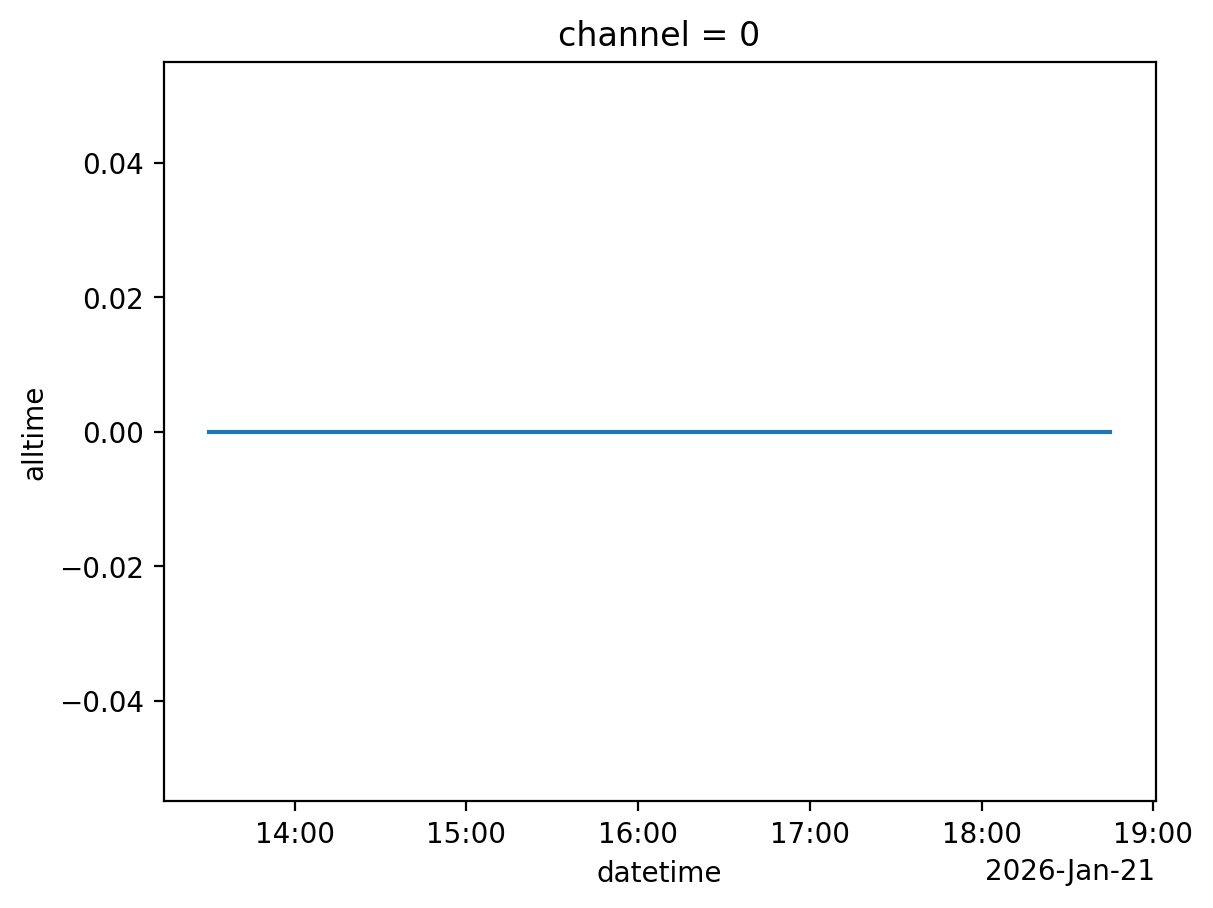

In [707]:
ch = 0
(dsold.alltime.sel(channel = ch) - dsnew.alltime.sel(channel = ch)).plot()

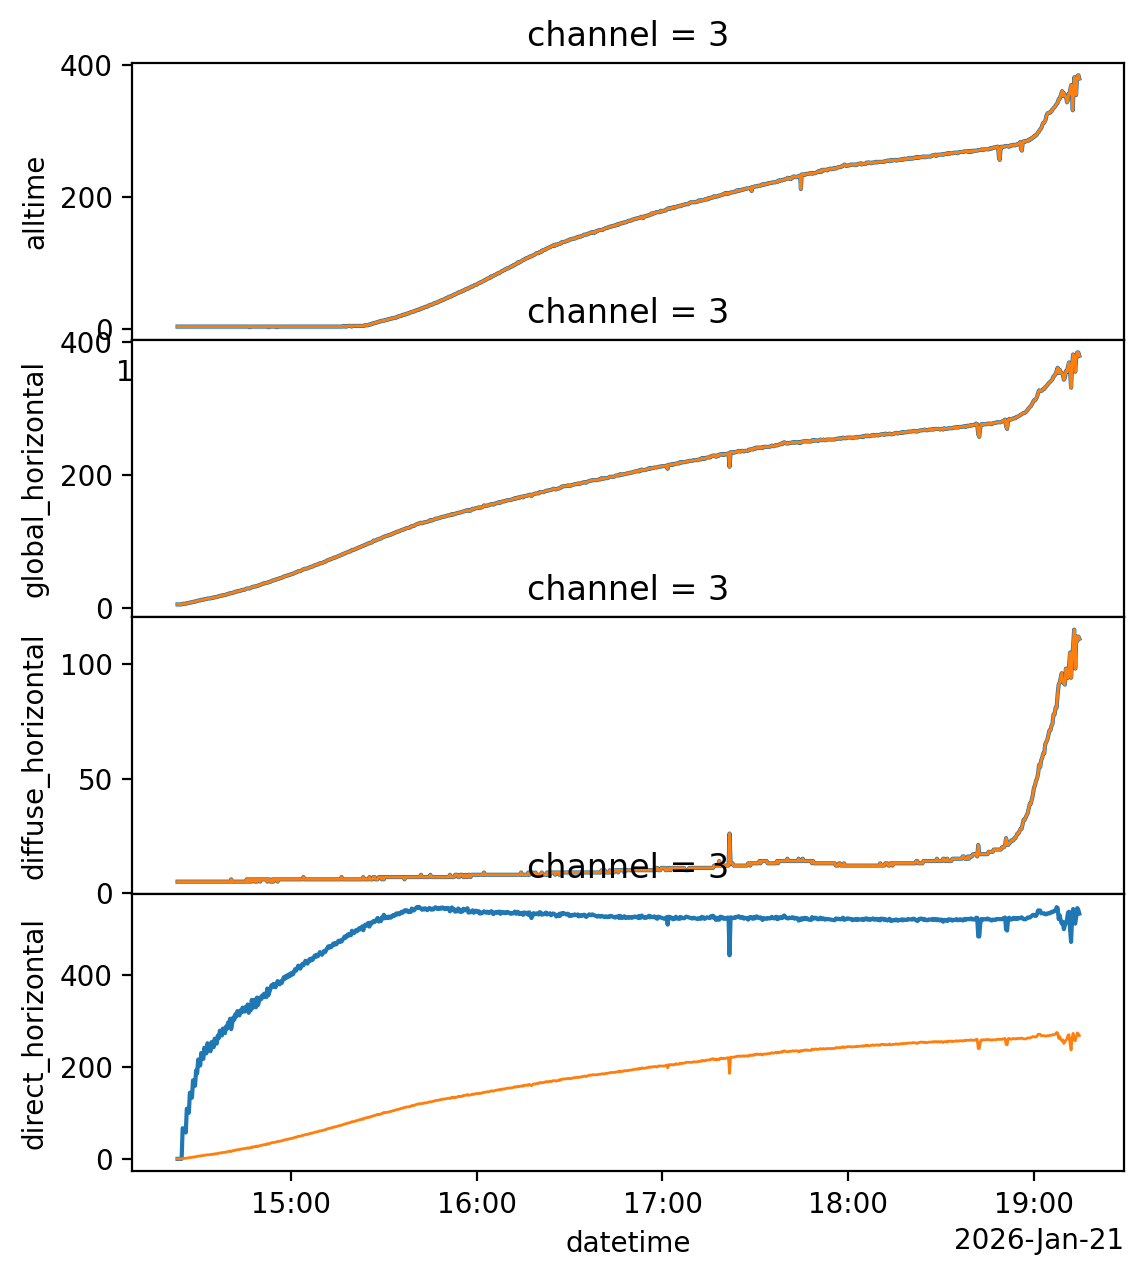

In [708]:
f,aa = plt.subplots(4, gridspec_kw={'hspace': 0})
f.set_figheight(f.get_figheight() * 1.5)
####
a = aa[0]
ch = 3
dsold.alltime.sel(channel = ch).plot(ax = a)
dsnew.alltime.sel(channel = ch).plot(ax = a, lw = 1)
####
a = aa[1]
# ch = 2
dsold.global_horizontal.sel(channel = ch).plot(ax = a)
dsnew.global_horizontal.sel(channel = ch).plot(ax = a, lw = 1)
####
a = aa[2]
# ch = 2
dsold.diffuse_horizontal.sel(channel = ch).plot(ax = a)
dsnew.diffuse_horizontal.sel(channel = ch).plot(ax = a, lw = 1)
####
a = aa[3]
# ch = 2
dsold.direct_normal.sel(channel = ch).plot(ax = a)
dsnew.direct_horizontal.sel(channel = ch).plot(ax = a, lw = 1)

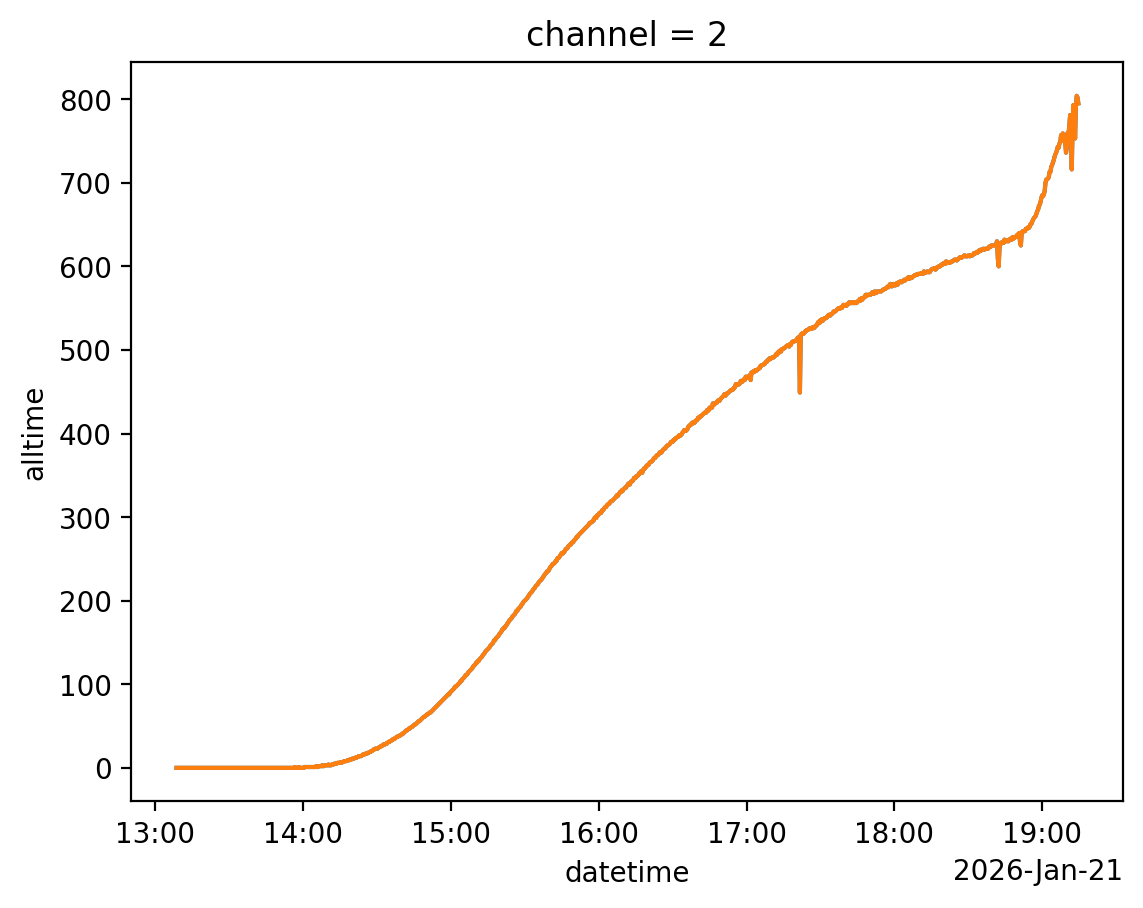

In [138]:
dsold.alltime.sel(channel = 2).plot()
dsnew.alltime.sel(channel = 2, wl).plot()

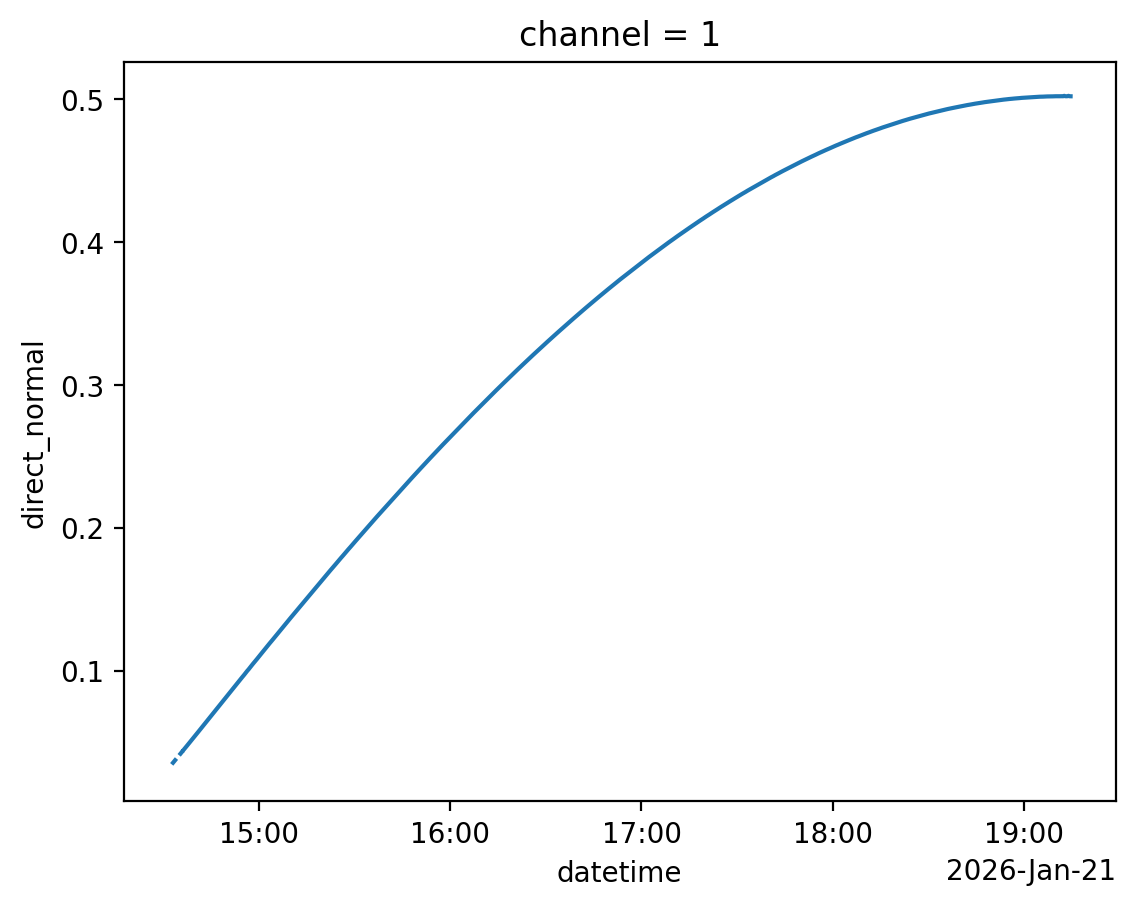

In [118]:
(dsnew.direct_normal.sel(channel = ch) / dsold.direct_normal.sel(channel = ch)).plot()


In [86]:
dsnew

<xarray.Dataset> Size: 255kB
Dimensions:             (datetime: 1099, channel: 7)
Coordinates:
  * datetime            (datetime) datetime64[ns] 9kB 2026-01-01T13:08:40.415...
  * channel             (channel) int64 56B 0 1 2 3 4 5 6
Data variables:
    alltime             (datetime, channel) int64 62kB 65 0 1 4 ... 203 289 152
    global_horizontal   (datetime, channel) float64 62kB nan nan ... 288.0 153.0
    diffuse_horizontal  (datetime, channel) float64 62kB nan nan ... 287.0 153.0
    direct_normal       (datetime, channel) float64 62kB nan nan nan ... 1.0 0.0

In [439]:
dsold

<xarray.Dataset> Size: 255kB
Dimensions:             (datetime: 1099, channel: 7)
Coordinates:
  * datetime            (datetime) datetime64[ns] 9kB 2026-01-21T13:08:40.415...
  * channel             (channel) int64 56B 0 1 2 3 4 5 6
Data variables:
    alltime             (datetime, channel) int64 62kB 64 0 0 4 ... 661 930 982
    global_horizontal   (datetime, channel) float64 62kB nan nan ... 930.0 982.0
    diffuse_horizontal  (datetime, channel) float64 62kB nan nan ... 256.0 272.0
    direct_normal       (datetime, channel) float64 62kB nan nan ... 1.413e+03
Attributes: (12/14)
    site_longitude:         -105.232544
    site_latitude:          40.116577
    site_elevation:         0
    site:                   TMP
    site_name:              unknown
    calibrated_irradiance:  False
    ...                     ...
    file_type:              13
    serial_no:              D824
    path2file:              /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026...
    measurement_sequenc:    20, 20, 20
    instrument_type:        mfrsr
    header:                 13 D824 3126 40.116577 105.232544 20 20 20 46042 ...

# why does the header_id not match with what i get from tu?

In [559]:
reload(srpsrf)

<module 'surfradpy.file_io.mfrsr' from '/Users/htelg/prog/SURFRAD/surfradpy/file_io/mfrsr.py'>

In [560]:
p2f = '/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260121_121500.xmd'
outnew = srpsrf.read_raw(p2f)
dsnew = outnew['ds']

Opening RSR file: /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260121_121500.xmd


In [561]:
inp = outnew['inp']


In [562]:
for d in dir(inp.head):
    if '__' in d:
        continue
    print(f'{d}: {getattr(inp.head, d)}')

all_the_time: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
avg_period: 20
band_on: 1
bipolar: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
counter: [0, 0, 0, 0, 0, 0]
days_1900: 46042
daytime: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
diodes: 7
dummy: 0
err: 0
extra: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
flags: 32
halt: 0
head_id: 3126
immed_out: 0
latitude: 40.1165771484375
logger_id: D824
longitude: 105.2325439453125
low_power: 0
met_on: 0
oao: 0
raw_all_the_time: 4607
raw_bipolar: 0
raw_counter: 0
raw_daytime: 0
raw_extra: 0
rsr_gain: 0
rsr_offset: 0
sample_rate: 20
secs_today: 47320
soft_rev: 13
volt_dog: 0


In [401]:
reload(srpsrf)

<module 'surfradpy.file_io.mfrsr' from '/Users/htelg/prog/SURFRAD/surfradpy/file_io/mfrsr.py'>

In [404]:
p2f = '/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw/2026/tbl_mfrsr_20260121_121500.xmd'
p2f = '/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfr10/raw/2026/tbl_mfr10_20260121_122217.xmd'
outnew = {}
outnew = srpsrf.read_raw(p2f, use_str=False, out = outnew)
dsnew = outnew['ds']

Opening RSR file: /Volumes/grad/Inst/MFR/SURFRAD/tbl/mfr10/raw/2026/tbl_mfr10_20260121_122217.xmd


In [342]:
for d in dir(inp.head):
    if '__' in d:
        continue
    print(f'{d}: {getattr(inp.head, d)}')

all_the_time: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
avg_period: 20
band_on: 0
bipolar: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
counter: [0, 0, 0, 0, 0, 0]
days_1900: 46042
daytime: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
diodes: 7
dummy: 0
err: 0
extra: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
flags: 0
halt: 0
head_id: 50461
immed_out: 0
latitude: 40.1275634765625
longitude: 105.238037109375
low_power: 0
met_on: 0
oao: 0
raw_all_the_time: 29695
raw_bipolar: 0
raw_counter: 0
raw_daytime: 0
raw_extra: 0
rsr_gain: 0
rsr_offset: 0
sample_rate: 20
secs_today: 47620
soft_rev: 13
unit_id: 43674
volt_dog: 0
